Se importan librerias necesarias para el análisis exploratorio de datos

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

EDA DEL DATASET STEAM GAMES

Se leen datos del archivo limpio de la fase de ETL

In [2]:
steam_games = pd.read_csv('../datasets/steam_games2.csv')

In [3]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71498 entries, 0 to 71497
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   publisher  59015 non-null  object 
 1   genres     71498 non-null  object 
 2   app_name   71496 non-null  object 
 3   price      68342 non-null  object 
 4   id         71498 non-null  int64  
 5   year       71169 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.3+ MB


In [17]:
steam_games.sample(20)

,publisher,genres,app_name,price,id,year
28080,Capcom,Action,Marvel vs. Capcom: Infinite - Ultron Conquest ...,3.99,721119,2017.0
65512,"Nicalis, Inc.",Action,1001 Spikes,14.99,260790,2014.0
32158,Drift Physics Crew,Racing,FURIDASHI - PREMIUM CAR: 2013 4S COUPE,2.99,731110,2017.0
32541,OtakuMaker SARL,Indie,Stickman Destruction,0.99,586270,2017.0
26022,CCP,Massively Multiplayer,EVE Online: 3 Months Omega Time,38.85,695741,2017.0
68313,"Square Enix, Feral Interactive (Mac), Feral In...",Adventure,Tomb Raider: M590 12ga,0.99,208799,2013.0
18342,VGstudio,Simulation,Infinitum,4.99,555670,2017.0
32246,Eternity Studios,Action,Wanderlust,7.99,729670,2017.0
53794,Microblast Games,Casual,Red Risk,0.99,448070,2016.0
2621,Greenheart Games,Strategy,Game Dev Tycoon,9.99,239820,2013.0


In [4]:
steam_games[['price','year']].describe()


,year
count,71169.000000
mean,2015.239571
std,2.787830
min,1983.000000
25%,2015.000000
50%,2016.000000
75%,2017.000000
max,2021.000000


Se calcula la cantidad de juegos en total segun el dataset

In [18]:
total_juegos = len(steam_games['id'].unique())
print(total_juegos)

28832


se utiliza la biblioteca Seaborn para trazar dos gráficos de caja (boxplots) lado a lado, mostrando la distribución de una variable categórica ('genres') en el conjunto de datos steam_games.

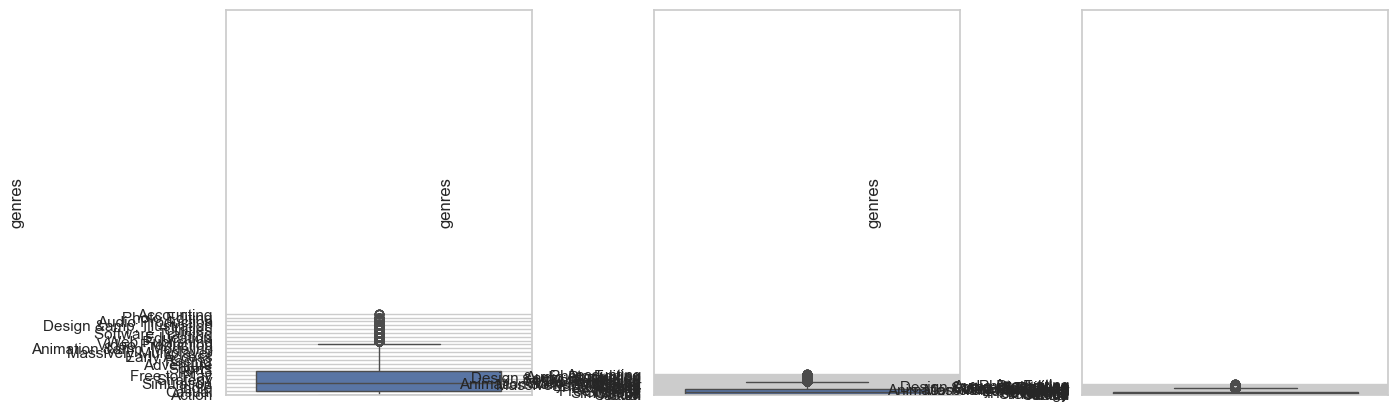

In [20]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=steam_games, y='genres', ax=ax[0])
sns.boxplot(data=steam_games, y='genres', ax=ax[1])
sns.boxplot(data=steam_games, y='genres', ax=ax[2])
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 800)

plt.subplots_adjust(wspace=0.4)
plt.show()

In [31]:
df_sorted = steam_games['genres'].value_counts().sort_values(ascending=False).reset_index()

In [34]:
df_sorted

,genres,count
0,Indie,15846
1,Action,11307
2,Casual,8279
3,Adventure,8235
4,Strategy,6954
5,Simulation,6694
6,RPG,5474
7,Free to Play,2031
8,Early Access,1460
9,Sports,1255


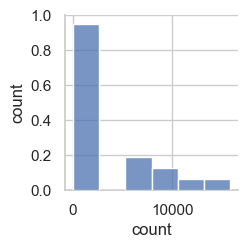

In [33]:
sns.pairplot(data=df_sorted)

C:\Users\jupai\AppData\Local\Temp\ipykernel_3912\1640807439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_sorted, y='genres', x='count', orient='h', palette=custom_palette)


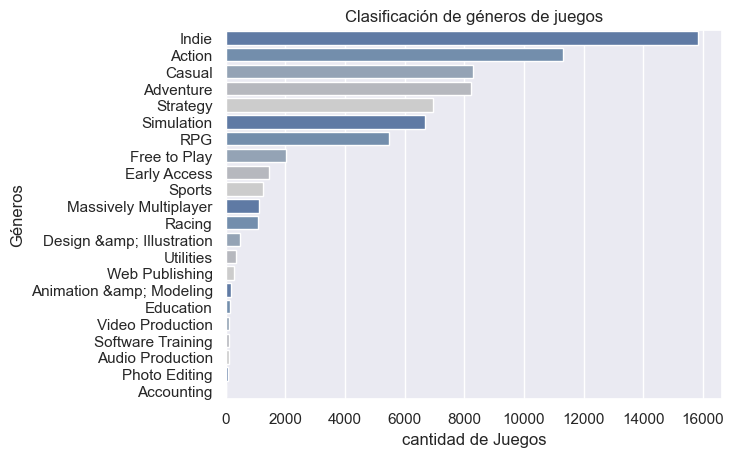

<Figure size 1000x700 with 0 Axes>

In [60]:

sns.set(style="darkgrid")
# Crear el gráfico de recuento con la paleta de colores personalizada
ax = sns.barplot(data=df_sorted, y='genres', x='count', orient='h', palette=custom_palette)

# Añadir etiquetas y título
plt.title('Clasificación de géneros de juegos')
plt.xlabel('cantidad de Juegos')
plt.ylabel('Géneros')
plt.figure(figsize=(10, 7))
sns.despine()
plt.show()

Análisis de precios de los juegos

ase grupa los datos en el DataFrame s por la columna 'id' y luego selecciona la columna 'price'. Para cada grupo de 'id', obtiene los valores únicos de 'price' y se convierte en una lista

In [44]:
precio_unicos = steam_games.groupby('id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos['price']

In [45]:
df_precio_unicos

0         9.99
1         4.99
2         4.99
3         4.99
4         4.99
         ...  
28827    24.99
28828    14.99
28829    49.99
28830    29.99
28831     4.99
Name: price, Length: 28832, dtype: object

se crea un gráfico de dispersión (strip plot) 
se traza un gráfico de caja (boxplot) en un subgráfico diferente y comparte el mismo eje x con el gráfico de dispersión anterior.

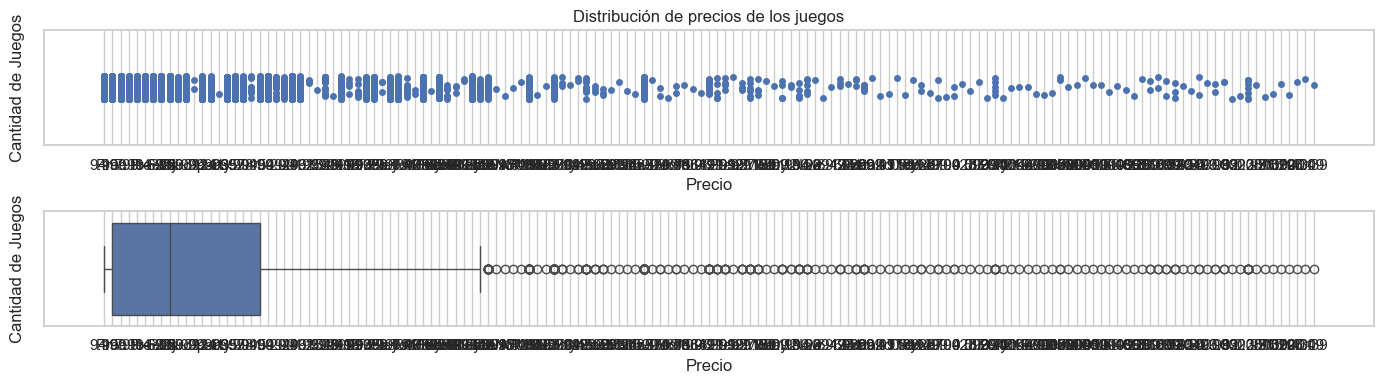

In [46]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=precio_unicos, x='price', ax=ax1)
ax1.set_xlabel('Precio')
ax1.set_ylabel('Cantidad de Juegos')
ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=precio_unicos, x='price', ax=ax2)
ax2.set_xlabel('Precio')
ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajusta el espaciado entre subplots
plt.tight_layout()
plt.show()

Un gráfico de dispersión (strip plot) muestra los datos como puntos individuales a lo largo de un eje categórico.Es útil para visualizar la distribución de datos en una variable categórica y detectar cualquier agrupación o patrón.

Un gráfico de caja (boxplot) muestra la distribución de los datos mediante cuartiles. visualizar la dispersión y la simetría de los datos e identificar valores atípicos potenciales.

EDA DE DATAFRAME USER REVIEWS

In [49]:
user_review = pd.read_csv('../datasets/user_reviews2.csv')

In [50]:
user_review.sample(10)

,user_id,posted,item_id,recommend,sentiment_analysis
33044,klnarutokl,"Posted October 12, 2015.",373330,False,1
53994,76561198078665145,"Posted December 16, 2013.",4000,True,0
51239,coil71,"Posted December 4, 2013.",230410,True,1
8975,76561198036037520,"Posted November 22, 2015.",730,True,2
34483,76561198076322243,"Posted February 11, 2015.",322170,True,2
27167,76561198074831889,"Posted September 23, 2013.",238320,True,1
40976,TSGStosh,"Posted January 5, 2014.",204300,True,2
38086,mmsharpeye,Posted May 9.,228880,True,1
53573,xarope123,"Posted December 27, 2014.",223710,True,1
38787,76561198134580826,Posted July 22.,10,True,1


Se utiliza Seaborn  para trazar un histograma de los datos lo cual  es una representación gráfica de la distribución de frecuencia de un conjunto de datos numéricos.

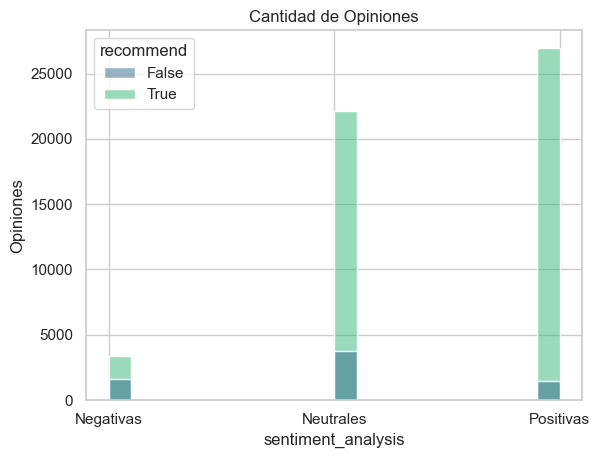

In [56]:
sns.histplot(data=user_review,x='sentiment_analysis',bins=20,palette='viridis',hue='recommend')
plt.title('Cantidad de Opiniones')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutrales', 'Positivas'])
plt.ylabel('Opiniones')
plt.show()

EDA DE DATAFRAME USER ITEMS

In [61]:
items= pd.read_csv('../datasets/user_item2.csv')

In [62]:
items.head()

,user_id,items_count,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,277,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0.0
2,76561197970982479,277,76561197970982479,30,Day of Defeat,7.0
3,76561197970982479,277,76561197970982479,40,Deathmatch Classic,0.0
4,76561197970982479,277,76561197970982479,50,Half-Life: Opposing Force,0.0


In [65]:
items['playtime_forever'].describe()

count    5.153209e+06
mean     9.914951e+02
std      5.418204e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

In [67]:
cantidad_user = items.groupby('user_id')['items_count'].unique().explode()
cantidad_user = pd.DataFrame(cantidad_user)


In [68]:
cantidad_user

,items_count
user_id,
--000--,58
--ace--,44
--ionex--,23
-2SV-vuLB-Kg,68
-404PageNotFound-,149
...,...
zzonci,5
zzoptimuszz,61
zzydrax,13


CANTIDAD DE TIEMPO POR USUARIO

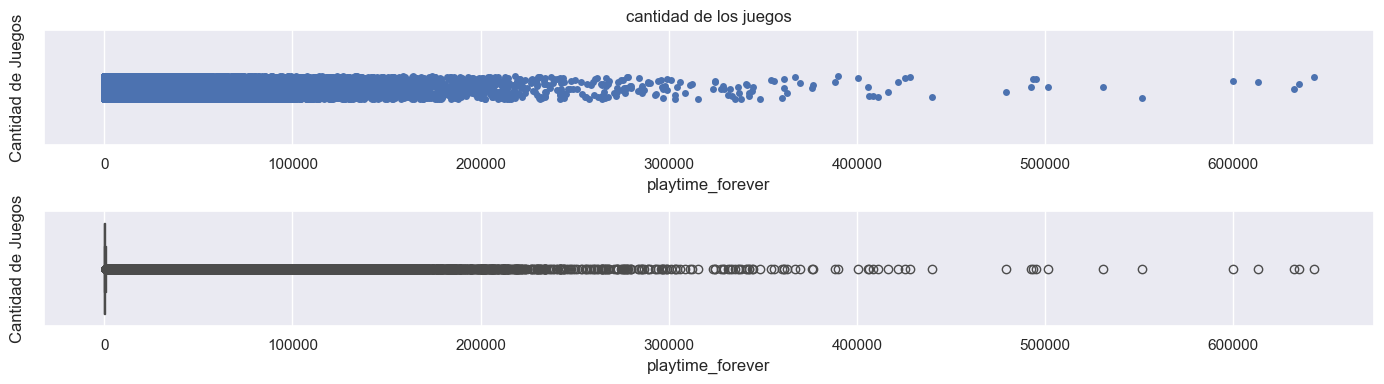

In [78]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items, x='playtime_forever', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de tiempo') ; ax1.set_title('cantidad de tiempo de juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items, x='playtime_forever', ax=ax2)
ax2.set_xlabel('playtime_forever') ; ax2.set_ylabel('Cantidad de tiempo')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

CANTIDAD DE JUEGOS POR USUARIO

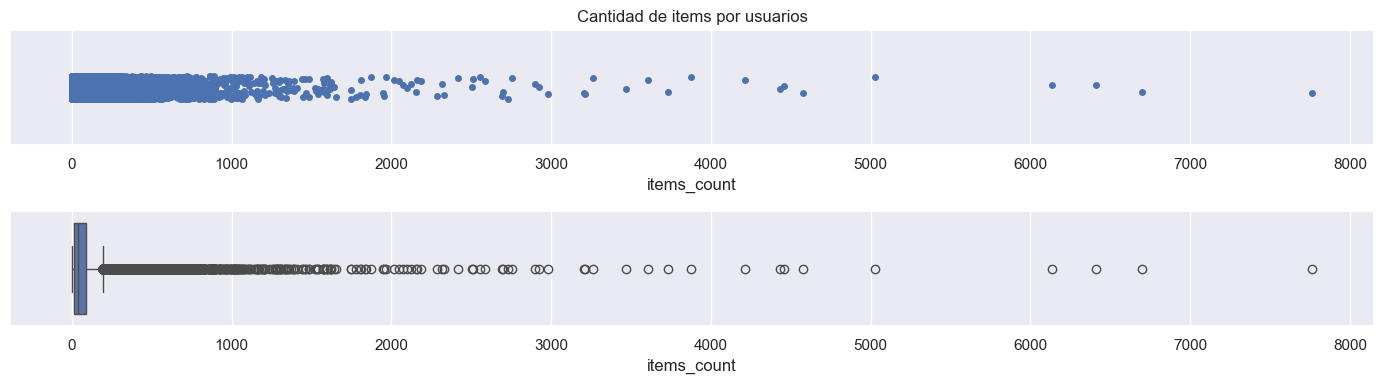

In [79]:
user = items.groupby('user_id')['items_count'].unique().explode()
user = pd.DataFrame(user)
user_o = user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [80]:
user

,items_count
user_id,
--000--,58
--ace--,44
--ionex--,23
-2SV-vuLB-Kg,68
-404PageNotFound-,149
...,...
zzonci,5
zzoptimuszz,61
zzydrax,13
